# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

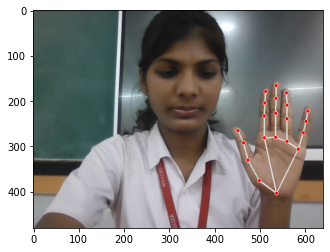

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 8.73228610e-01,  7.69743264e-01,  3.24927157e-07,  8.01795244e-01,
        7.14432955e-01, -2.29373425e-02,  7.48649001e-01,  6.16261721e-01,
       -3.11502591e-02,  7.16115654e-01,  5.34854412e-01, -3.90058495e-02,
        6.82417035e-01,  4.76872653e-01, -4.65433933e-02,  7.90394247e-01,
        4.97975558e-01, -8.37681163e-03,  7.58202076e-01,  3.96950662e-01,
       -2.82634534e-02,  7.39276588e-01,  3.34765583e-01, -4.54924852e-02,
        7.26088047e-01,  2.77771831e-01, -5.90514056e-02,  8.38720083e-01,
        4.81879026e-01, -1.52423149e-02,  8.20028901e-01,  3.61852109e-01,
       -3.22827920e-02,  8.09783399e-01,  2.87884355e-01, -4.91893068e-02,
        8.01253557e-01,  2.22953260e-01, -6.19219132e-02,  8.87158155e-01,
        4.93088394e-01, -2.69894991e-02,  8.77136409e-01,  3.80175054e-01,
       -4.84835170e-02,  8.69134307e-01,  3.10949743e-01, -6.33847862e-02,
        8.60654950e-01,  2.47141689e-01, -7.38009587e-02,  9.36196148e-01,
        5.24769783e-01, -

In [25]:
468*3+33*4+21*3+21*3

1662

In [26]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 8.73228610e-01,  7.69743264e-01,  3.24927157e-07,  8.01795244e-01,
        7.14432955e-01, -2.29373425e-02,  7.48649001e-01,  6.16261721e-01,
       -3.11502591e-02,  7.16115654e-01,  5.34854412e-01, -3.90058495e-02,
        6.82417035e-01,  4.76872653e-01, -4.65433933e-02,  7.90394247e-01,
        4.97975558e-01, -8.37681163e-03,  7.58202076e-01,  3.96950662e-01,
       -2.82634534e-02,  7.39276588e-01,  3.34765583e-01, -4.54924852e-02,
        7.26088047e-01,  2.77771831e-01, -5.90514056e-02,  8.38720083e-01,
        4.81879026e-01, -1.52423149e-02,  8.20028901e-01,  3.61852109e-01,
       -3.22827920e-02,  8.09783399e-01,  2.87884355e-01, -4.91893068e-02,
        8.01253557e-01,  2.22953260e-01, -6.19219132e-02,  8.87158155e-01,
        4.93088394e-01, -2.69894991e-02,  8.77136409e-01,  3.80175054e-01,
       -4.84835170e-02,  8.69134307e-01,  3.10949743e-01, -6.33847862e-02,
        8.60654950e-01,  2.47141689e-01, -7.38009587e-02,  9.36196148e-01,
        5.24769783e-01, -

# 4. Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data_Mg') 

# Actions that we try to detect
actions = np.array(['Alone','Call','Flower','Food','I am good','Ok Fine','Stop','There is Gun'])


# Fifty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 30

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [252]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread (0x8a9a7b0).
Cannot move to target thread (0x81aedc0)

QObject::moveToThread: Current thread (0x81aedc0) is not the object's thread

In [25]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:

label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'Alone': 0,
 'Call': 1,
 'Flower': 2,
 'Food': 3,
 'I am good': 4,
 'Ok Fine': 5,
 'Stop': 6,
 'There is Gun': 7}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(400, 30, 126)

In [36]:
np.array(labels).shape

(400,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(400, 30, 126)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
y.shape

(400, 8)

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
y_val.shape

(80, 8)

# 7. Build and Train LSTM Neural Network

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.regularizers import l1
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [44]:
log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

checkpoint = ModelCheckpoint("New1_model.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=20,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import regularizers

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(256, return_sequences=False, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(actions.shape[0], activation='softmax'))


In [46]:
res = [.7, 0.2, 0.1]

In [47]:
actions[np.argmax(res)]

'Alone'

In [48]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
import tensorflow as tf
model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0001),
                   metrics=['accuracy', tf.keras.metrics.AUC()])


In [49]:
history = model.fit(X_train, y_train, epochs=150, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/150
10/10 [==============================] - 3s 128ms/step - loss: 2.1754 - accuracy: 0.2067 - auc: 0.5343 - val_loss: 2.1680 - val_accuracy: 0.2625 - val_auc: 0.5798

Epoch 00001: val_accuracy improved from -inf to 0.26250, saving model to New1_model.h5
Epoch 2/150
10/10 [==============================] - 1s 69ms/step - loss: 2.1636 - accuracy: 0.3168 - auc: 0.6250 - val_loss: 2.1558 - val_accuracy: 0.2875 - val_auc: 0.6758

Epoch 00002: val_accuracy improved from 0.26250 to 0.28750, saving model to New1_model.h5
Epoch 3/150
10/10 [==============================] - 1s 69ms/step - loss: 2.1453 - accuracy: 0.3349 - auc: 0.7210 - val_loss: 2.1324 - val_accuracy: 0.3625 - val_auc: 0.7241

Epoch 00003: val_accuracy improved from 0.28750 to 0.36250, saving model to New1_model.h5
Epoch 4/150
10/10 [==============================] - 1s 73ms/step - loss: 2.1212 - accuracy: 0.4482 - auc: 0.7493 - val_loss: 2.0844 - val_accuracy: 0.3500 - val_auc: 0.7429

Epoch 00004: val_accuracy did no

In [49]:
import os
from matplotlib import pyplot as plt
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Saving the accuracy plot
if not os.path.exists('graphs'):
    os.makedirs('graphs')
plt.savefig('graphs/Custom and mobilenet accuracy.png')

# Plotting the loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Saving the loss plot
if not os.path.exists('graphs'):
    os.makedirs('graphs')
plt.savefig('graphs/Custom and mobilenet loss.png')

NameError: name 'history' is not defined

In [70]:
import tensorflow as tf

# Replace 'your_model.h5' with the path to your .h5 file
model_path = 'New1_model.h5'

# Load the model
model = tf.keras.models.load_model(model_path)

# Display a summary of the loaded model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
Total params: 641,672
Trainable params: 641,672
Non-trainable params: 0
__________________________________________________

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
Total params: 641,672
Trainable params: 641,672
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [72]:
res = model.predict(X_val)

In [73]:
actions[np.argmax(res[4])]

'Call'

In [74]:
actions[np.argmax(y_val[4])]

'Call'

In [75]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [76]:
yhat = model.predict(X_val)

In [77]:
ytrue = np.argmax(y_val, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [78]:
accuracy_score(ytrue, yhat)

0.9625

In [79]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Assuming you have already split your data and trained your model
# X_test and y_test are the test dataset and labels respectively

# Get model predictions
y_pred = model.predict(X_val)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

# Extract true positives, false positives, and false negatives
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP

# Calculate Dice Score for each class
dice_scores = 2 * TP / (2 * TP + FP + FN)

# Calculate average Dice Score
average_dice_score = np.mean(dice_scores)


print("Dice Score per class:", dice_scores)
print("Average Dice Score:", average_dice_score)


Dice Score per class: [0.96       1.         1.         0.92307692 0.93333333 1.
 0.76923077 1.        ]
Average Dice Score: 0.9482051282051283


In [80]:
from sklearn.metrics import classification_report

In [81]:
report= classification_report(ytrue,yhat)

In [82]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      0.86      0.92         7
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.62      1.00      0.77         5
           7       1.00      1.00      1.00        13

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.98      0.96      0.97        80



In [94]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf

# Load the model
model_path = 'New1_model.h5'
model = tf.keras.models.load_model(model_path)

# Assuming you have the training history saved as a .pkl file
import pickle

# Replace 'your_history.pkl' with the path to your history file
history_path = 'history.pkl'

# Load the training history
with open(history_path, 'rb') as file:
    history = pickle.load(file)

# Plotting the accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Saving the accuracy plot
if not os.path.exists('graphs'):
    os.makedirs('graphs')
plt.savefig('graphs/Custom_and_mobilenet_accuracy.png')
plt.show()

# Plotting the loss
plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Saving the loss plot
if not os.path.exists('graphs'):
    os.makedirs('graphs')
plt.savefig('graphs/Custom_and_mobilenet_loss.png')
plt.show()

# Display a summary of the loaded model
model.summary()


FileNotFoundError: [Errno 2] No such file or directory: 'history.pkl'

# 10. Evaluation using Confusion Matrix and Accuracy

In [83]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [84]:
yhat = model.predict(X_val)

In [85]:
ytrue = np.argmax(y_val, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [86]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[67,  0],
        [ 1, 12]],

       [[67,  0],
        [ 0, 13]],

       [[69,  0],
        [ 0, 11]],

       [[73,  0],
        [ 1,  6]],

       [[72,  0],
        [ 1,  7]],

       [[70,  0],
        [ 0, 10]],

       [[72,  3],
        [ 0,  5]],

       [[67,  0],
        [ 0, 13]]], dtype=int64)

# 11. Test in Real Time

In [87]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    for num, prob in enumerate(res):
        color_index = min(num, len(colors) - 1)  # Ensure the color index is within the bounds of the colors list
        width = int(prob * 100)
        cv2.rectangle(output_frame, (0, 60 + num * 40), (width, 90 + num * 40), colors[color_index], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame

In [88]:
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         # Convert the probability to'1','2','3','4','5' an integer for the width parameter
#         width = int(prob * 100)
#         cv2.rectangle(output_frame, (0, 60 + num * 40), (width, 90 + num * 40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
#                     cv2.LINE_AA)

#     return output_frame

In [91]:
sequence = []
sentence = []
threshold = 0.5

# Set up Mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Open video capture
cap = cv2.VideoCapture(0)

try:
    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()

        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            # Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

        # Display sentence on the screen
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break the loop on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

finally:
    # Release resources
    cap.release()
    cv2.destroyAllWindows()

There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Call
Stop
Stop
Stop
Stop
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
There is Gun
Ther

Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Flower
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Ok Fine
Call
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop
Stop

In [ ]:
cap.release()
cv2.destroyAllWindows()